In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import cv2
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

path='dataset_bangla'
images=[]
classNo=[]
testRatio =0.2
valRatio=0.2
imgDimension=(45,45,1)

In [2]:
myList = os.listdir(path)
numOfClasses=len(myList)
for x in range(0,numOfClasses):
    mypic=os.listdir(path+'/'+str(x))
    for y in mypic:
        curImg = cv2.imread(path+'/'+str(x)+'/'+y)
        curImg = cv2.resize(curImg,(imgDimension[0],imgDimension[1]))
        images.append(curImg)
        classNo.append(x)
    print(x)

images=np.array(images)
classNo=np.array(classNo)
        




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [3]:
x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=valRatio)

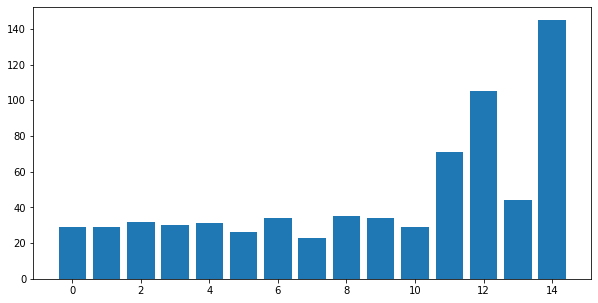

In [4]:
numOfSample =[]

for x in range(0,numOfClasses):
    numOfSample.append(len(np.where(y_train==x)[0]))

plt.figure(figsize=(10,5))
plt.bar(range(0,numOfClasses),numOfSample)
plt.show()

In [5]:
def preprocessing(img):
	# img=np.astype("uint8")
	img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	_, img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
	img=cv2.equalizeHist(img)
	img=img/255
	return img


x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))

In [7]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)


dataGen=ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	zoom_range=0.2,
	shear_range=0.1,
	rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train, numOfClasses)
y_test=to_categorical(y_test, numOfClasses)
y_validation=to_categorical(y_validation, numOfClasses)

In [8]:
def myModel():
	noOfFilters=60
	sizeOfFilter1=(5,5)
	sizeOfFilter2=(3,3)
	sizeOfPool=(2,2)
	noOfNode=50

	model=Sequential()
	model.add((Conv2D(noOfFilters, sizeOfFilter1, input_shape=(imgDimension[0],imgDimension[1],1),activation='relu')))
	model.add((Conv2D(noOfFilters, sizeOfFilter1,activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))

	model.add((Conv2D(noOfFilters//2, sizeOfFilter2,activation='relu')))
	model.add((Conv2D(noOfFilters//2, sizeOfFilter2,activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))
	model.add(Dropout(0.5))


	model.add(Flatten())
	model.add(Dense(noOfNode, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(numOfClasses, activation='softmax'))
	model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
	return model

model=myModel()
print(model.summary())

history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50),
	epochs=100,
	validation_data=(x_validation,y_validation),
	shuffle=1)

model.save("datamodel.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 41, 41, 60)        1560      
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 60)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 30)        8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 30)         0         
 2D)                                                  

C:\Users\User\AppData\Local\Temp\ipykernel_7744\1152833071.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50),


14/14 [==============================] - 6s 396ms/step - loss: 2.6444 - accuracy: 0.1306 - val_loss: 2.6114 - val_accuracy: 0.1886
Epoch 2/100
14/14 [==============================] - 6s 412ms/step - loss: 2.6064 - accuracy: 0.1779 - val_loss: 2.5941 - val_accuracy: 0.1886
Epoch 3/100
14/14 [==============================] - 6s 394ms/step - loss: 2.5605 - accuracy: 0.1980 - val_loss: 2.5183 - val_accuracy: 0.1886
Epoch 4/100
14/14 [==============================] - 6s 406ms/step - loss: 2.5505 - accuracy: 0.1865 - val_loss: 2.4696 - val_accuracy: 0.1886
Epoch 5/100
14/14 [==============================] - 6s 428ms/step - loss: 2.4331 - accuracy: 0.2109 - val_loss: 2.2793 - val_accuracy: 0.2571
Epoch 6/100
14/14 [==============================] - 6s 396ms/step - loss: 2.2938 - accuracy: 0.2482 - val_loss: 2.0798 - val_accuracy: 0.3371
Epoch 7/100
14/14 [==============================] - 5s 371ms/step - loss: 2.2254 - accuracy: 0.2468 - val_loss: 1.9576 - val_accuracy: 0.3714
Epoch 8/100